In [21]:
import cv2 as cv
import matplotlib.pyplot as plt
from imutils.perspective import four_point_transform 
import imutils

In [9]:
img = cv.imread("image/sudoku3.jpg")
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#cv.imwrite("image/imgGray.jpg" , imgGray)

True

True

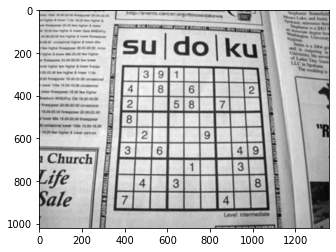

In [8]:
imgBlur = cv.GaussianBlur(imgGray, (7,7), 3)
plt.imshow(imgBlur, cmap="gray")
#cv.imwrite("image/imgBlur.jpg" , imgBlur)

True

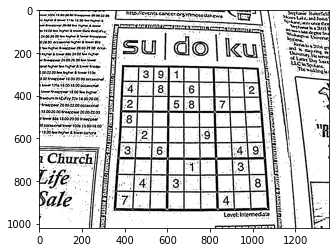

In [16]:
thresh = cv.adaptiveThreshold(imgBlur, 255, adaptiveMethod=cv.ADAPTIVE_THRESH_GAUSSIAN_C, thresholdType=cv.THRESH_BINARY, blockSize=11, C=2)
plt.imshow(thresh, cmap="gray")
#cv.imwrite("image/thresh.jpg" , thresh)
#thresh = cv.adaptiveThreshold(imgBlur, 255, adaptiveMethod=cv.ADAPTIVE_THRESH_GAUSSIAN_C, thresholdType=cv.THRESH_BINARY_INV, blockSize=11, C=2)

True

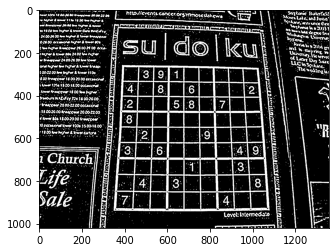

In [17]:
thresh = cv.bitwise_not(thresh)
plt.imshow(thresh, cmap="gray")
#cv.imwrite("image/threshBitwiseNot.jpg" , thresh)

In [19]:
contours = cv.findContours(thresh, mode=cv.RETR_EXTERNAL, method=cv.CHAIN_APPROX_SIMPLE)
contours = contours[0]
#contours

In [20]:
contours = sorted(contours, key=cv.contourArea, reverse=True)

True

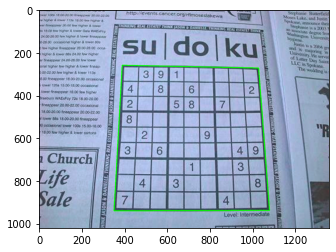

In [15]:
sudokuContour = None
for contour in contours:

    epsilon = 0.01 * cv.arcLength(contour, True)
    approx = cv.approxPolyDP(contour, epsilon, True)
    if len(approx) == 4 :
        sudokuContour = approx
        break
        
if sudokuContour is None:
    print("can't find sudoku table..." )
else:
    result = cv.drawContours(img, [sudokuContour], -1, (0,255,0), 4)
    plt.imshow(result)
#cv.imwrite("image/result.jpg" , result)

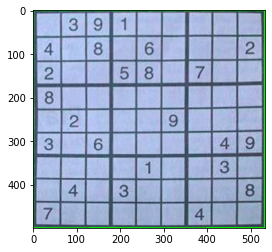

In [22]:
cropSudoku = four_point_transform(img, approx.reshape(4,2))
#plate = cv.resize(cropSudoku, (600, 600))
plate = imutils.resize(cropSudoku, height = 500)
plt.imshow(plate)
#cv.imwrite("image/crop.jpg" , plate)